# *Project: Stitistics from Stock Data (Google, Apple, Amazon)*

In this lab we will load stock data into a Pandas Dataframe and calculate some statistics on it. We will be working with stock data from Google, Apple, and Amazon. All the stock data was downloaded from yahoo finance in CSV format. In your workspace you should have a file named GOOG.csv containing the Google stock data, a file named AAPL.csv containing the Apple stock data, and a file named AMZN.csv containing the Amazon stock data. (You can see the workspace folder by clicking on the Jupyter logo in the upper left corner of the workspace. The solution notebook is also available there.) All the files contain 7 columns of data:

Date Open High Low Close Adj_Close Volume

We will start by reading in any of the above CSV files into a DataFrame and see what the data looks like.

In [1]:
# Setup and Initial Data Exploration

# Import the Pandas library for data manipulation and analysis
import pandas as pd

# Import os library to set the working directory
import os
os.chdir(r"C:\Users\Naspers_Labs\desktop\udacity\aws_ai_scientist\data-analysis-python\pandas")

# Read the raw stock data CSV file for Google into a Pandas DataFrame
df = pd.read_csv('./GOOG.csv')

# Display the first 5 rows of the DataFrame to get an initial understanding of the data structure
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.676899,51.693783,47.669952,49.845802,49.845802,44994500
1,2004-08-20,50.178635,54.187561,49.925285,53.805050,53.805050,23005800
2,2004-08-23,55.017166,56.373344,54.172661,54.346527,54.346527,18393200
3,2004-08-24,55.260582,55.439419,51.450363,52.096165,52.096165,15361800
4,2004-08-25,52.140873,53.651051,51.604362,52.657513,52.657513,9257400


We clearly see that the Dataframe has automatically labeled the row indices using integers and has labeled the columns of the DataFrame using the names of the columns in the CSV files.

To Do
You will now load the stock data from Google, Apple, and Amazon into separte DataFrames. However, for each stock data you will only be interested in loading the Date and Adj Close columns into the Dataframe. In addtion, you want to use the Date column as your row index. Finally, you want the DataFrame to recognize the dates as actual dates (year/month/day) and not as strings. For each stock, you can accomplish all theses things in just one line of code by using the appropiate keywords in the pd.read_csv() function. Here are a few hints:

Use the index_col keyword to indicate which column you want to use as an index. For example index_col = ['Open']

Set the parse_dates keyword equal to True to convert the Dates into real dates of the form year/month/day

Use the usecols keyword to select which columns you want to load into the DataFrame. For example usecols = ['Open', 'High']

Fill in the code below: Loading Multiple Stock Datasets

In [2]:
# Load Google stock data, selecting only the 'Date' and 'Adj Close' columns.

# Set 'Date' as the index and parse it as datetime for time series analysis
google_stock = pd.read_csv('./GOOG.csv', index_col=['Date'], parse_dates=True, usecols=['Date', 'Adj Close'])

# Load Apple stock data with the same structure for consistency
apple_stock = pd.read_csv('./AAPL.csv', index_col=['Date'], parse_dates=True, usecols=['Date', 'Adj Close'])

# Load Amazon stock data similarly
amazon_stock = pd.read_csv('./AMZN.csv', index_col=['Date'], parse_dates=True, usecols=['Date', 'Adj Close'])

You can check that you have loaded the data correctly by displaying the head of the DataFrames.

In [3]:
# Inspecting Individual Datasets

# Display the first 5 rows of Google stock data to ensure proper loading
google_stock.head()

# Optionally, check Apple and Amazon stock data similarly
# apple_stock.head()
# amazon_stock.head()

,Adj Close
Date,
2004-08-19,49.845802
2004-08-20,53.805050
2004-08-23,54.346527
2004-08-24,52.096165
2004-08-25,52.657513


You will now join the three DataFrames above to create a single new DataFrame that contains all the Adj Close for all the stocks. Let's start by creating an empty DataFrame that has as row indices calendar days between 2000-01-01 and 2016-12-31. We will use the pd.date_range() function to create the calendar dates first and then we will create a DataFrame that uses those dates as row indices:

In [4]:
# Creating a Unified DataFrame for Analysis

# Generate a date range covering the analysis period from 2000-01-01 to 2016-12-31
dates = pd.date_range('2000-01-01', '2016-12-31')

# Create an empty DataFrame with these dates as the index
# This ensures a uniform timeline to join all stock data
all_stocks = pd.DataFrame(index=dates)

To Do

You will now join the the individual DataFrames, google_stock, apple_stock, and amazon_stock, to the all_stocks DataFrame. However, before you do this, it is necessary that you change the name of the columns in each of the three dataframes. This is because the column labels in the all_stocks dataframe must be unique. Since all the columns in the individual dataframes have the same name, Adj Close, we must change them to the stock name before joining them. In the space below change the column label Adj Close of each individual dataframe to the name of the corresponding stock. You can do this by using the pd.DataFrame.rename() function.

In [5]:
# Renaming Columns for Clarity

# Rename the 'Adj Close' column to reflect the company name
# This improves readability when combining multiple stocks in a single DataFrame
google_stock = google_stock.rename(columns={'Adj Close': 'Google'})
apple_stock = apple_stock.rename(columns={'Adj Close': 'Apple'})
amazon_stock = amazon_stock.rename(columns={'Adj Close': 'Amazon'})

You can check that the column labels have been changed correctly by displaying the datadrames

In [6]:
# Inspecting a Single Stock (Optional)

# Display the first 5 rows of Google stock after renaming columns
google_stock.head()

,Google
Date,
2004-08-19,49.845802
2004-08-20,53.805050
2004-08-23,54.346527
2004-08-24,52.096165
2004-08-25,52.657513


Now that we have unique column labels, we can join the individual DataFrames to the `all_stocks` DataFrame. For this we will use the `dataframe.join()` function. The function `dataframe1.join(dataframe2)` joins `dataframe1` with `dataframe2`. We will join each dataframe one by one to the `all_stocks` dataframe. Fill in the code below to join the dataframes, the first join has been made for you:

In [7]:
# Combining All Stock Data

# Join Google stock data to the empty all_stocks DataFrame
all_stocks = all_stocks.join(google_stock)

# Join Apple stock data to the all_stocks DataFrame
all_stocks = all_stocks.join(apple_stock)

# Join Amazon stock data to the all_stocks DataFrame
all_stocks = all_stocks.join(amazon_stock)

You can check that the dataframes have been joined correctly by displaying the all_stocks dataframe

In [8]:
# Inspecting the Combined Dataset

# Display the first 5 rows of the combined stock DataFrame
all_stocks.head()

,Google,Apple,Amazon
2000-01-01,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN
2000-01-03,NaN,3.596616,89.3750
2000-01-04,NaN,3.293384,81.9375
2000-01-05,NaN,3.341579,69.7500


In [9]:
# Descriptive Statistics

# Get an overview of the stock price distributions: count, mean, std, min, max, etc.
all_stocks.describe()

,Google,Apple,Amazon
count,3115.000000,4277.000000,4277.000000
mean,347.420229,35.222976,166.095436
std,187.671596,37.945557,189.212345
min,49.681866,0.843106,5.970000
25%,220.088539,3.221090,38.009998
50%,286.397247,17.524017,76.980003
75%,508.255340,64.533600,243.919998
max,813.109985,126.941574,844.359985


To Do
Before we proceed to get some statistics on the stock data, let's first check that we don't have any NaN values. In the space below check if there are any NaN values in the all_stocks dataframe. If there are any, remove any rows that have NaN values:

In [10]:
# Handling Missing Data

# Count the number of missing values per column to check for incomplete data
all_stocks.isnull().sum()

# Remove any rows with missing values to ensure clean analysis
# This operation is done inplace to save memory
all_stocks.dropna(axis=0, inplace=True)

Now that you have eliminated any NaN values we can now calculate some basic statistics on the stock prices. Fill in the code below

In [11]:
# Key Statistical Measures

# Calculate and print average stock price for each company
print('The average stock price for each stock is: \n', all_stocks.mean(), '\n')

# Calculate and print median stock price
print('The median stock price for each stock is: \n', all_stocks.median(), '\n')

# Calculate and print standard deviation to measure volatility
print('The standard deviation of the stock price for each stock is: \n', all_stocks.std(), '\n')

# Compute and print correlation between stock prices
# This helps understand how the stocks move relative to each other
print('The correlation between stocks is: \n', all_stocks.corr(), '\n')

The average stock price for each stock is: 
 Google    347.420229
Apple      47.736018
Amazon    216.598177
dtype: float64 

The median stock price for each stock is: 
 Google    286.397247
Apple      39.461483
Amazon    161.820007
dtype: float64 

The standard deviation of the stock price for each stock is: 
 Google    187.671596
Apple      37.421555
Amazon    199.129792
dtype: float64 

The correlation between stocks is: 
           Google     Apple    Amazon
Google  1.000000  0.900242  0.952444
Apple   0.900242  1.000000  0.886321
Amazon  0.952444  0.886321  1.000000 



We will now look at how we can compute some rolling statistics, also known as moving statistics. We can calculate for example the rolling mean (moving average) of the Google stock price by using the Pandas dataframe.rolling().mean() method. The dataframe.rolling(N).mean() calculates the rolling mean over an N-day window. In other words, we can take a look at the average stock price every N days using the above method. Fill in the code below to calculate the average stock price every 150 days for Google stock

In [12]:
# Rolling Mean for Trend Analysis

# Compute a rolling mean (moving average) with a 150-day window for Google stock
# This smooths out short-term fluctuations and highlights long-term trends
rollingMean = all_stocks['Google'].rolling(150).mean()
rollingMean

2004-08-19           NaN
2004-08-20           NaN
2004-08-23           NaN
2004-08-24           NaN
2004-08-25           NaN
                 ...    
2016-12-23    758.236666
2016-12-27    758.713066
2016-12-28    759.111599
2016-12-29    759.502732
2016-12-30    759.763799
Name: Google, Length: 3115, dtype: float64

We can also visualize the rolling mean by plotting the data in our dataframe. In the following lessons you will learn how to use Matplotlib to visualize data. For now I will just import matplotlib and plot the Google stock data on top of the rolling mean. You can play around by changing the rolling mean window and see how the plot changes.

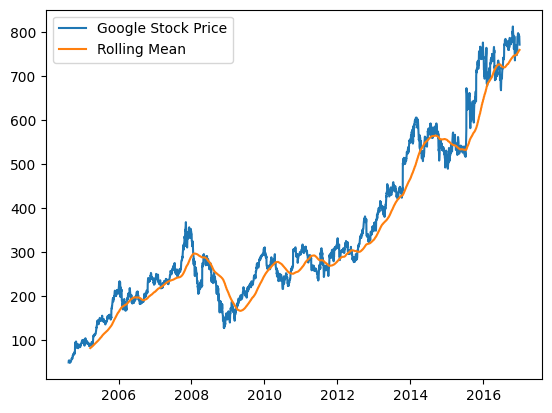

In [13]:
# Visualization

# Ensure plots are rendered inline in the notebook
%matplotlib inline

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Plot the original Google stock prices
plt.plot(all_stocks['Google'])

# Overlay the rolling mean to visualize trends clearly
plt.plot(rollingMean)

# Add a legend for clarity
plt.legend(['Google Stock Price', 'Rolling Mean'])

# Display the plot
plt.show()